In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

### Generating Data

In [10]:
data, labels = make_blobs(n_samples= 1000, centers = 4, n_features= 2, random_state= 4)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [11]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["orange", "green", "skyblue"])

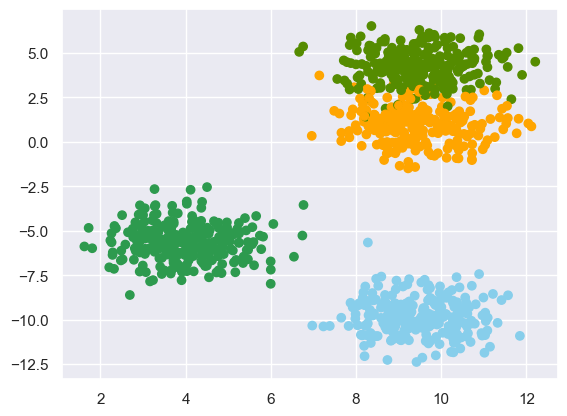

In [12]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap= my_cmap)
plt.show()

In [13]:
labels_orignal = labels
labels = np.mod(labels_orignal, 2)

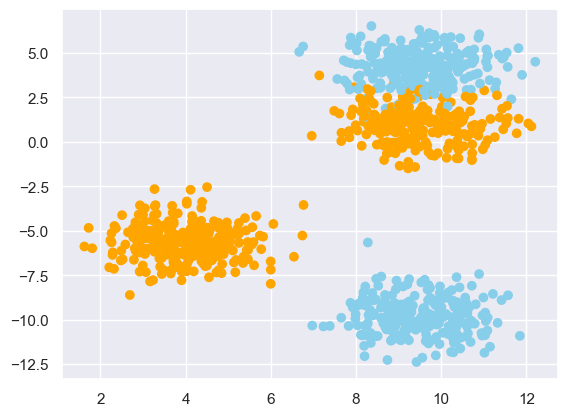

In [14]:
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap= my_cmap)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify= labels, random_state= 42)
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


### ANN

In [19]:
class FirstANN:

    def __init__(self) -> None:
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

    def forward(self, x):
        # 2 input and 2 neurons in first layer, 1 output neuron
        self.x1, self.x2 = x
        self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    

    def grad(self, x, y):
        self.forward(x)

        self.dw5 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h1
        self.dw6 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.h2
        self.db3 = (self.h3 - y) * self.h3 * (1 - self.h3)

        self.dw1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x1
        self.dw2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1) * self.x2
        self.db1 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w5 * self.h1 * (1 - self.h1)


        self.dw3 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x1
        self.dw4 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2) * self.x2
        self.db2 = (self.h3 - y) * self.h3 * (1 - self.h3) * self.w6 * self.h2 * (1 - self.h2)

    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True, display_loss = False):

        if initialize:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0

        if display_loss:
            loss = {}


        for i in range(epochs):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0] * 9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3

            m = X.shape[1]
            self.w1 -= learning_rate * dw1/ m
            self.w2 -= learning_rate * dw2/ m
            self.w3 -= learning_rate * dw3/ m
            self.w4 -= learning_rate * dw4/ m
            self.w5 -= learning_rate * dw5/ m
            self.w6 -= learning_rate * dw6/ m
            self.b1 -= learning_rate * db1/ m
            self.b2 -= learning_rate * db2/ m
            self.b3 -= learning_rate * db3/ m


            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared error")
            plt.show()


    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)


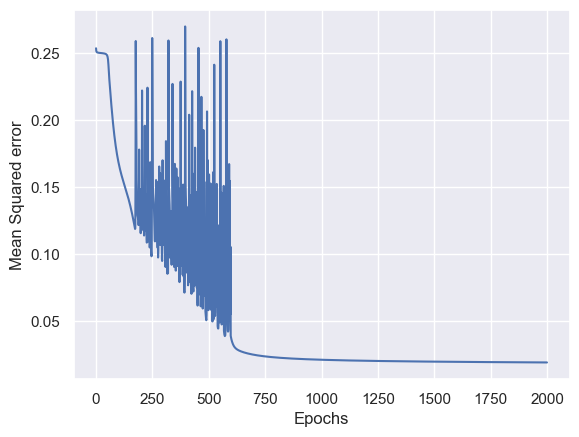

In [32]:
ann = FirstANN()
ann.fit(X_train, y_train, epochs= 2000, learning_rate= 0.01, display_loss= True)

In [29]:
Y_pred_train = ann.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = ann.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, y_test)

print(f"Training accuracy: {round(accuracy_train, 2)}")
print(f"Testing accuracy: {round(accuracy_test, 2)}")

Training accuracy: 0.71
Testing accuracy: 0.71


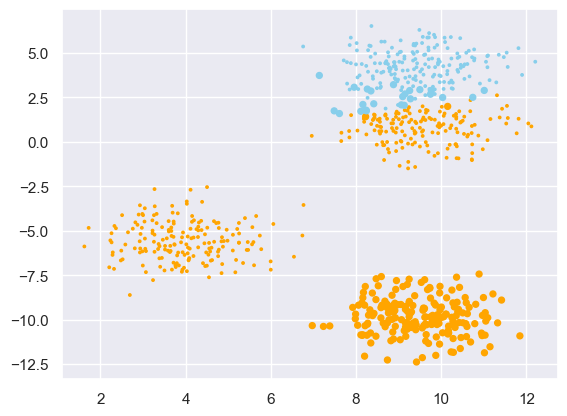

In [31]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_pred_binarised_train, cmap= my_cmap, s= 15 * (np.abs(Y_pred_binarised_train - y_train) + .2))
plt.show()

### General ANN Class

In [61]:
class ANN:

    def __init__(self, n_inputs, hidden_sizes = [2]) -> None:
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]

        self.W = {}
        self.B = {}
        for i in range(self.nh + 1):
            self.W[i + 1] = np.random.randn(self.sizes[i], self.sizes[i + 1])
            self.B[i + 1] = np.zeros((1, self.sizes[i + 1]))

    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    

    def forward(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh + 1):
            self.A[i + 1] = np.matmul(self.H[i], self.W[i + 1]) + self.B[i + 1]
            self.H[i + 1] = self.sigmoid(self.A[i + 1])
        return self.H[self.nh + 1]


    def grad_sigmoid(self, x):
        return x * (1 - x)
    

    def grad(self, x , y):
        self.forward(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}    
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k - 1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k - 1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k - 1] = np.multiply(self.dH[k - 1], self.grad_sigmoid(self.H[k - 1]))


    def fit(self, X, Y, epochs = 1, learning_rate = 1, initialize = True, display_loss = False):

        if initialize:
            for i in range(self.nh + 1):
                self.W[i + 1] = np.random.randn(self.sizes[i], self.sizes[i + 1])
                self.B[i + 1] = np.zeros((1, self.sizes[i + 1]))


        if display_loss:
            loss = {}

        
        for e in range(epochs):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i + 1] = np.zeros((self.sizes[i], self.sizes[i + 1]))
                dB[i + 1] = np.zeros((1, self.sizes[i + 1]))

            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh + 1):
                    dW[i + 1] += self.dW[i + 1]
                    dB[i + 1] += self.dB[i + 1]

            m = X.shape[1]
            for i in range(self.nh + 1):
                self.W[i + 1] -= learning_rate * dW[i + 1] / m
                self.B[i + 1] -= learning_rate * dB[i + 1] / m


            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel("Epochs")
            plt.ylabel("Mean Squared error")
            plt.show()


    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

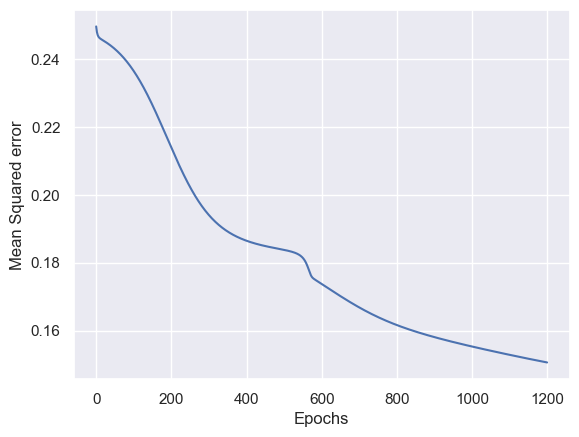

In [65]:
ann = ANN(2, [2, 3])
ann.fit(X_train, y_train, epochs= 1200, learning_rate= 0.001, display_loss= True)

In [66]:
Y_pred_train = ann.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = ann.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_test = accuracy_score(Y_pred_binarised_test, y_test)

print(f"Training accuracy: {round(accuracy_train, 2)}")
print(f"Testing accuracy: {round(accuracy_test, 2)}")

Training accuracy: 0.71
Testing accuracy: 0.71


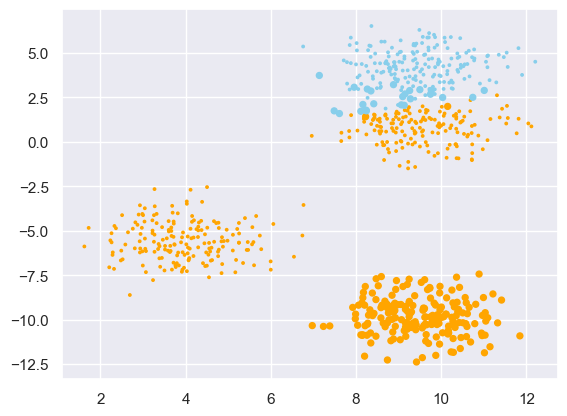

In [67]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_pred_binarised_train, cmap= my_cmap, s= 15 * (np.abs(Y_pred_binarised_train - y_train) + .2))
plt.show()